In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
url = 'https://www.pagina12.com.ar/'
p12 = requests.get(url)

In [3]:
p12.status_code

200

In [4]:
s = BeautifulSoup(p12.text, 'lxml')

In [5]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/audiovisuales">Audiovisuales</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/recordatorios">Recordatorios</a></li>]

In [6]:
links_secciones = [sec.a.get('href') for sec in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/audiovisuales',
 'https://www.pagina12.com.ar/secciones/recordatorios']

## Obteniendo listado de notas

Probemos con una sección cualquiera

In [7]:
sec = requests.get(links_secciones[0])
sec.status_code

200

In [8]:
s = BeautifulSoup(sec.text, 'lxml')

In [9]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" property="og:url"/>
  <meta content="La puja política de coyuntura y la reflexión de

Vemos que hay un *featured article* principal y después una lista de artículos dentro de un tag `<ul>` con el resto de las notas.
#### Extrayendo el *featured article*

In [10]:
featured_article = s.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/226528-el-tuit-negacionista-de-gomez-centurion">Celebró llegar a 30 mil seguidores en Twitter con una indignante alusión a los desaparecidos</a></span><h2><a href="https://www.pagina12.com.ar/226528-el-tuit-negacionista-de-gomez-centurion">El tuit negacionista de Gómez Centurión</a></h2><a href="https://www.pagina12.com.ar/226528-el-tuit-negacionista-de-gomez-centurion"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">21 de octubre de 2019</span></div></div>

In [11]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/226528-el-tuit-negacionista-de-gomez-centurion'

#### Extrayendo el resto de las notas

In [12]:
article_list = s.find('ul', attrs={'class':'article-list'})

Y dentro de la lista hay varios `<li>` con los items

In [13]:
article_list.find_all('li')

[<li></li>,
 <li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/226527-ganadores-y-perdedores-del-debate-presidencial">Ganadores y perdedores del debate presidencial<i>|</i><span>Una encuesta registró que se impuso Alberto Fernández</span></a></h2><div class="data-bar"><span class="date-1">21 de octubre de 2019</span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit" href="https://www.pagina12.com.ar/226527-ganadores-y-perdedores-del-debate-presidencial"><img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_16_9_300x169/public/media/articles/25049/d84ed5496

Nos quedamos con el texto de cada item para ver qué contienen

In [14]:
[li.get_text() for li in article_list.find_all('li')]

['',
 'Ganadores y perdedores del debate presidencial|Una encuesta registró que se impuso Alberto Fernández21 de octubre de 2019',
 '',
 'Debate presidencial: las frases con mayor impacto positivo|Según un análisis en tiempo real del observatorio Pulsar de la UBA21 de octubre de 2019',
 '',
 'Alberto Fernández: "Macri ya es parte de la historia"|Definiciones tras el debate presidencial21 de octubre de 2019',
 '',
 'Sergio Maldonado: "Macri es un hipócrita y mentiroso"|Cuestionó duramente al Presidente por decir en el debate que la causa por la muerte de su hermano estaba concluida21 de octubre de 2019',
 '',
 '"La educación no puede reparar lo que el mercado desarregló"|Atlas de la educación, una radiografía de los últimos 30 años del sistema21 de octubre de 2019',
 '',
 'La alegría y alguien que faltará21 de octubre de 2019|Por Eduardo Aliverti',
 '',
 'La última semana21 de octubre de 2019|Por Mempo Giardinelli',
 '',
 'Una baldosa por la memoria|Homenaje a Pedro Leopoldo Barraza y C

Vemos que hay varios tags vacíos. Procedemos a eliminarlos

In [15]:
for li in article_list.find_all('li'):
    if len(li.get_text()) == 0:
        li.decompose()

In [16]:
[li.get_text() for li in article_list.find_all('li')]

['Ganadores y perdedores del debate presidencial|Una encuesta registró que se impuso Alberto Fernández21 de octubre de 2019',
 'Debate presidencial: las frases con mayor impacto positivo|Según un análisis en tiempo real del observatorio Pulsar de la UBA21 de octubre de 2019',
 'Alberto Fernández: "Macri ya es parte de la historia"|Definiciones tras el debate presidencial21 de octubre de 2019',
 'Sergio Maldonado: "Macri es un hipócrita y mentiroso"|Cuestionó duramente al Presidente por decir en el debate que la causa por la muerte de su hermano estaba concluida21 de octubre de 2019',
 '"La educación no puede reparar lo que el mercado desarregló"|Atlas de la educación, una radiografía de los últimos 30 años del sistema21 de octubre de 2019',
 'La alegría y alguien que faltará21 de octubre de 2019|Por Eduardo Aliverti',
 'La última semana21 de octubre de 2019|Por Mempo Giardinelli',
 'Una baldosa por la memoria|Homenaje a Pedro Leopoldo Barraza y Carlos Laham, asesinados por la Triple A 

Ya obtuvimos los tags con contenido. Ahora extraemos los links a las notas.

In [17]:
items = [li.a.get('href') for li in article_list.find_all('li')]
items

['https://www.pagina12.com.ar/226527-ganadores-y-perdedores-del-debate-presidencial',
 'https://www.pagina12.com.ar/226525-debate-presidencial-las-frases-con-mayor-impacto-positivo',
 'https://www.pagina12.com.ar/226521-alberto-fernandez-macri-ya-es-parte-de-la-historia',
 'https://www.pagina12.com.ar/226518-sergio-maldonado-macri-es-un-hipocrita-y-mentiroso',
 'https://www.pagina12.com.ar/226419-la-educacion-no-puede-reparar-lo-que-el-mercado-desarreglo',
 'https://www.pagina12.com.ar/226424-la-alegria-y-alguien-que-faltara',
 'https://www.pagina12.com.ar/226428-la-ultima-semana',
 'https://www.pagina12.com.ar/226431-una-baldosa-por-la-memoria',
 'https://www.pagina12.com.ar/226362-la-marcha-de-los-millonarios',
 'https://www.pagina12.com.ar/226443-la-nueva-oleada',
 'https://www.pagina12.com.ar/226452-las-principales-frases-del-debate-presidencial',
 'https://www.pagina12.com.ar/226461-que-paso-en-el-debate-presidencial-los-cruces-entre-los-cand',
 'https://www.pagina12.com.ar/226466

Ahora metamos todo el proceso en una función

In [18]:
def scrap_section_page(url):
    '''
    Función que recibe la url de una sección del diario y devuelve una lista con los links a las notas
    '''
    
    # Obtenemos la página
    try:
        r = requests.get(url)
    except Exception as e:
        print('Error obteniendo la página. Excepción ',e)
        return np.nan
    
    if r.status_code != 200:
        print('Error obteniendo la página. Status Code', r.status_code)
        return np.nan
    
    # Generamos una lista vacía para ir poblándola con las notas
    lista_notas = []
    
    # Parseamos el HTML de la página
    s = BeautifulSoup(r.text, 'lxml')
    
    # Obtenemos la noticia promocionada
    featured_article = s.find('div', attrs={'class':'featured-article__container'})
    if featured_article is not None:
        try:
            lista_notas.append(featured_article.a.get('href'))
        except:
            pass
    
    # Obtenemos la lista de noticias
    article_list = s.find('ul', attrs={'class':'article-list'})
    # Obtenemos los items de la lista
    items = article_list.find_all('li')
    # Extraemos los links de los items que no están vacíos
    for li in items:
        if li.a is not None:
            lista_notas.append(li.a.get('href'))
    
    return lista_notas

Probemos la función

In [19]:
scrap_section_page(links_secciones[0])

['https://www.pagina12.com.ar/226527-ganadores-y-perdedores-del-debate-presidencial',
 'https://www.pagina12.com.ar/226525-debate-presidencial-las-frases-con-mayor-impacto-positivo',
 'https://www.pagina12.com.ar/226521-alberto-fernandez-macri-ya-es-parte-de-la-historia',
 'https://www.pagina12.com.ar/226518-sergio-maldonado-macri-es-un-hipocrita-y-mentiroso',
 'https://www.pagina12.com.ar/226419-la-educacion-no-puede-reparar-lo-que-el-mercado-desarreglo',
 'https://www.pagina12.com.ar/226424-la-alegria-y-alguien-que-faltara',
 'https://www.pagina12.com.ar/226428-la-ultima-semana',
 'https://www.pagina12.com.ar/226431-una-baldosa-por-la-memoria',
 'https://www.pagina12.com.ar/226362-la-marcha-de-los-millonarios',
 'https://www.pagina12.com.ar/226443-la-nueva-oleada',
 'https://www.pagina12.com.ar/226452-las-principales-frases-del-debate-presidencial',
 'https://www.pagina12.com.ar/226461-que-paso-en-el-debate-presidencial-los-cruces-entre-los-cand',
 'https://www.pagina12.com.ar/226466

Para extraer varias páginas de la misma sección:

In [56]:
notas = []
for link in links_secciones:
    for pagina in range(5):
        url = link+f'?page={pagina}'
        print(f'Obteniendo links de {url}')
        notas += scrap_section_page(url)

Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=5
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=6
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=7
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=8
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=9
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=10
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=11
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=12
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=13
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=14
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=15
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=16
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=17
Obteniendo links de https://www.pagina12.co

Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=6
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=7
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=8
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=9
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=10
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=11
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=12
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=13
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=14
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=15
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=16
Obteniendo links de https://www.pagina12.com.ar/secciones/recordatorios?page=17
Obteniendo links de https://www.pagina12.com

In [57]:
len(notas)

1509

Eliminamos notas duplicadas

In [58]:
notas = set(notas)

In [59]:
len(notas)

1493

In [24]:
np.random.choice(list(notas),10)

array(['https://www.pagina12.com.ar/225899-coloquio-de-idea-de-la-euforia-con-macri-no-quedo-ni-el-recu',
       'https://www.pagina12.com.ar/225380-argentina-piensa',
       'https://www.pagina12.com.ar/210255-rolando-pisoni-irene-bellocchio-osvaldo-anibal-matoski',
       'https://www.pagina12.com.ar/225874-evo-prometio-una-paliza-al-neoliberalismo-y-el-fmi',
       'https://www.pagina12.com.ar/225584-beneficios-para-los-que-apuesten-por-la-investigacion-y-el-d',
       'https://www.pagina12.com.ar/209930-monica-susana-tresaco',
       'https://www.pagina12.com.ar/226277-con-otra-sorpresa',
       'https://www.pagina12.com.ar/211467-jose-daniel-gropper-julio-kalejman-desaparecidos-de-el-vesub',
       'https://www.pagina12.com.ar/226204-veracruz-tigres-protesta-escandalo-y-anti-fair-play',
       'https://www.pagina12.com.ar/226300-newells-y-lanus-se-prenden-arriba'],
      dtype='<U95')

## Scraping de una nota

In [25]:
nota = requests.get('https://www.pagina12.com.ar/222818-river-vs-boca-obligan-a-exactas-a-suspender-las-clases-por-e')
nota.status_code

200

In [26]:
s_nota = BeautifulSoup(nota.text, 'lxml')
print(s_nota.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   La facultad de suspender todo lo que no se llame fú...  | Página12
  </title>
  <link href="https://www.pagina12.com.ar/222818-la-facultad-de-suspender-todo-lo-que-no-se-llame-futbol" rel="canonical"/>
  <link href="https://www.pagina12.com.ar/amp/222818-la-facultad-de-suspender-todo-lo-que-no-se-llame-futbol" rel="amphtml"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La política del gobierno de la Ciudad de postergar todo en pos de 
priorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Fa..." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta conte

### Extrayendo la fecha

La fecha de la nota se encuentra en un tag *span* con el atributo **pubdate="pubdate"**

In [27]:
s_nota.find('span', attrs={'pubdate':'pubdate'})

<span datetime="2019-10-02" pubdate="pubdate">02 de octubre de 2019</span>

Para extraer la fecha, la podemos sacar del atributo **datetime**

In [28]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')

'2019-10-02'

O del texto del tag

In [29]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get_text()

'02 de octubre de 2019'

### Extrayendo el título

El título de las notas suele estar recortado en la URL, por eso es conveniente sacarlo de la nota en sí.

In [30]:
s_nota.find('div', attrs={'class':'article-title'})

<div class="article-title">La facultad de suspender todo lo que no se llame fútbol</div>

In [31]:
s_nota.find('div', attrs={'class':'article-title'}).get_text()

'La facultad de suspender todo lo que no se llame fútbol'

### Extrayendo la volanta

In [32]:
s_nota.find('div', attrs={'class':'article-prefix'})

<div class="article-prefix">El operativo de seguridad porteño por el Superclásico invadió muchas esferas</div>

In [33]:
s_nota.find('div', attrs={'class':'article-title'}).get_text()

'La facultad de suspender todo lo que no se llame fútbol'

### Extrayendo el copete [RETO]

In [34]:
s_nota.find('div', attrs={'class':'article-summary'})

<div class="article-summary">La política del gobierno de la Ciudad de postergar todo en pos de
priorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Facultad de Exactas. El rol del Comité de Seguridad del Fútbol de CABA y el absolutismo en el ministerio encabezado por Patricia Bullrich.</div>

In [35]:
s_nota.find('div', attrs={'class':'article-summary'}).get_text()

'La política del gobierno de la Ciudad de postergar todo en pos de\npriorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Facultad de Exactas. El rol del Comité de Seguridad del Fútbol de CABA y el absolutismo en el ministerio encabezado por Patricia Bullrich.'

### Extrayendo el texto de la nota

In [36]:
texto_nota = s_nota.find('div', attrs={'class':'article-text'})
texto_nota

<div class="article-text"><p><b>El saber no ocupa lugar, dice un viejo proverbio. El fútbol parece que sí.</b> Omnipresente como es –y más si se trata de un <b>River vs. Boca por la Copa Libertadores</b>– otra vez dio señales de cómo lo invade todo. El problema es que el deporte-espectáculo, cuando produce un evento como el Superclásico, adquiere un <b>protagonismo que congela o anula a las demás actividades</b>.<br/></p><p> Esa idea se fortalece cuando desde<b> un ministerio que cree tener el poder absoluto en sus manos –el de Seguridad de Patricia Bullrich– </b>se estimula el concepto de que en la vida se suspende todo menos un partido, "el partido". Esa política después se contagia a otras áreas semejantes. <b>Se cierran calles, estaciones, escuelas</b>, instalaciones de clubes no vinculadas al fútbol y también universidades. Este panorama lo hizo visible un comunicado de la <b>Facultad de Ciencias Exactas y Naturales de la UBA</b> que salió al cruce de Marcelo D'Alessandro, el secr

Tenemos 2 tags indeseados:
- un 'div' con contenido embebido
- un 'a' con una referencia al mail del autor

In [37]:
def scrap_texto(texto_nota):
    
    texto=None
    try:
        texto_nota.find('div').decompose()
    except:
        pass
    try:
        texto_nota.find('a', attrs={'class':"__cf_email__"}).decompose()
    except:
        pass
    try:
        texto = texto_nota.get_text()
    except:
        pass
    
    return texto

In [38]:
scrap_texto(texto_nota)

'El saber no ocupa lugar, dice un viejo proverbio. El fútbol parece que sí. Omnipresente como es –y más si se trata de un River vs. Boca por la Copa Libertadores– otra vez dio señales de cómo lo invade todo. El problema es que el deporte-espectáculo, cuando produce un evento como el Superclásico, adquiere un protagonismo que congela o anula a las demás actividades. Esa idea se fortalece cuando desde un ministerio que cree tener el poder absoluto en sus manos –el de Seguridad de Patricia Bullrich– se estimula el concepto de que en la vida se suspende todo menos un partido, "el partido". Esa política después se contagia a otras áreas semejantes. Se cierran calles, estaciones, escuelas, instalaciones de clubes no vinculadas al fútbol y también universidades. Este panorama lo hizo visible un comunicado de la Facultad de Ciencias Exactas y Naturales de la UBA que salió al cruce de Marcelo D\'Alessandro, el secretario de Justicia y Seguridad de la CABA, aunque no lo nombra más que por el car

### Extrayendo el autor

In [39]:
s_nota.find('div', attrs={'class':'article-author'})

<div class="article-author"><span><span>Por </span><a href="https://www.pagina12.com.ar/autores/845-gustavo-veiga">Gustavo Veiga</a></span></div>

En este caso el nombre del autor se encuentra dentro del tag 'a' con referencia a su propia página

In [40]:
s_nota.find('div', attrs={'class':'article-author'}).a.get_text()

'Gustavo Veiga'

### Extrayendo la sección

In [41]:
s_nota.find('div', attrs={'class':'suplement'})

<div class="suplement"><a href="https://www.pagina12.com.ar/secciones/deportes/notas">Deportes</a></div>

In [42]:
s_nota.find('div', attrs={'class':'suplement'}).get_text()

'Deportes'

### Extrayendo la imagen principal

In [43]:
s_nota.find('div', attrs={'class':'article-main-media-image'})

<div class="article-main-media-image"><div class="article-main-media-image__container object-fit-block--contain"><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-la

Extraemos la imagen

In [44]:
s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')

[<img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992

Hay más de una imágen! veamos las diferencias

In [45]:
[img.get('data-src') for img in s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')]

['https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic']

Intentemos quedarnos con la imagen de mayor tamaño

In [46]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})
imagenes = media.find_all('img')
if len(imagenes) == 0:
    print('no se encontraron imágenes')
elif len(imagenes) == 1:
    # Hay un único link
    imagen = imagenes[0]
    img = imagen.get('data-src')
else:
    imagen = media.find('img',attrs={'class':'show-for-xlarge'})
    if imagen is None:
        imagen = media.find('img',attrs={'class':'show-for-large'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-medium'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-small'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                    if imagen is None:
                        print('No se pudo recuprerar imagen')
    if imagen is not None:
        img =  imagen.get('data-src')
img    

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic'

Obtenemos la imagen

In [47]:
img_data = requests.get(img)

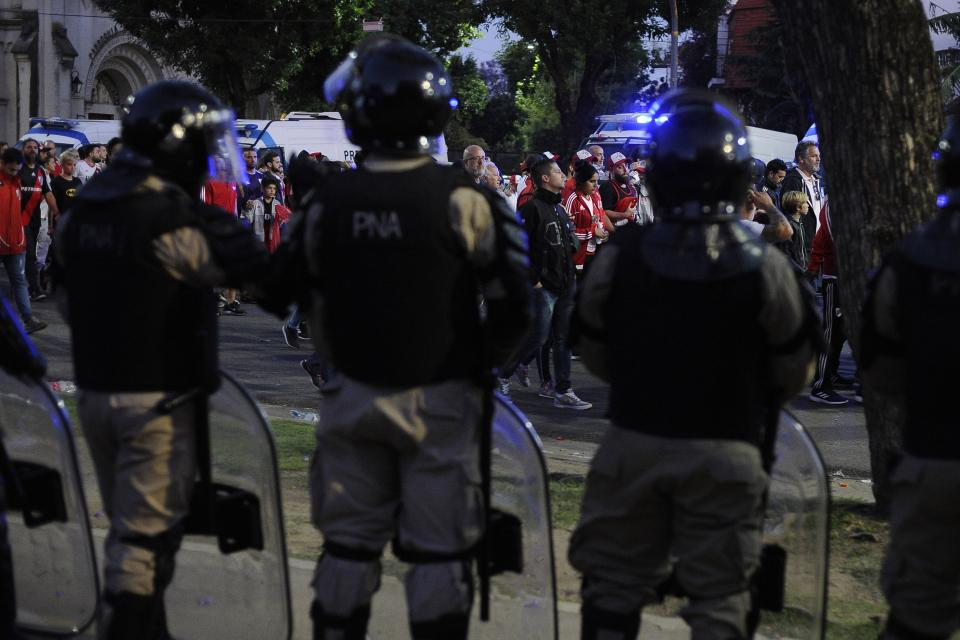

In [48]:
from IPython.display import Image
Image(img_data.content)

In [49]:
def extraer_imagen(soup_nota):
    #soup_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')
    media = soup_nota.find('div', attrs={'class':'article-main-media-image'})
    if media is None:
        print('Nota sin imagen')
        return np.nan
    imagenes = media.find_all('img')
    if len(imagenes) == 0:
        print('no se encontraron imágenes')
    elif len(imagenes) == 1:
        # Hay un único link
        imagen = imagenes[0]
        img = imagen.get('data-src')
    else:
        imagen = media.find('img',attrs={'class':'show-for-xlarge'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-large'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-medium'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-small'})
                    if imagen is None:
                        imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                        if imagen is None:
                            print('No se pudo recuprerar imagen')
        if imagen is not None:
            img =  imagen.get('data-src')
    try:
        img_data = requests.get(img)
    except Exception as e:
        print('Error obteniendo imagen, con error', e)
    if img_data.status_code == 200:
        return img_data.content
    else:
        print('Error obteniendo imagen, con status code: ', img_data.status_code)
        return np.nan
    

In [50]:
import numpy as np
def scrap_nota(url):
    '''
    Función que recibe la URL de una nota y devuelve un diccionario con la información de la misma
    '''
    # Hago la request a la url de la nota
    nota = requests.get(url)
    # Verifico si hubo error
    if nota.status_code != 200:
        print('Error obteniendo nota. Status code: {}'.format(nota.status_code))
        return np.nan
    
    # Preparo el diccionario para el retorno
    ret_dict = {'url':url}
    
    # Parseo el contenido
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    # Extraigo la fecha
    try:
        ret_dict['fecha'] = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    except:
        ret_dict['fecha'] = np.nan
    
    # Extraigo el titulo
    try:
        ret_dict['titulo'] = s_nota.find('div', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['titulo'] = np.nan
    
    # Extraigo la volanta
    try:
        ret_dict['volanta'] = s_nota.find('div', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['volanta'] = np.nan
    
    # Extraigo el copete
    try:
        ret_dict['copete'] = s_nota.find('div', attrs={'class':'article-summary'}).get_text()
    except:
        ret_dict['copete'] = np.nan
    
    # Extraigo el texto
    try:
        texto_nota = s_nota.find('div', attrs={'class':'article-text'})
        ret_dict['texto'] = scrap_texto(texto_nota)
    except:
        ret_dict['texto'] = np.nan
        
    # Extraigo el autor
    try:
        ret_dict['autor'] = s_nota.find('div', attrs={'class':'article-author'}).a.get_text()
    except:
        ret_dict['autor'] = np.nan
    
    # Extraigo la seccion
    try:
        ret_dict['seccion'] = s_nota.find('div', attrs={'class':'suplement'}).get_text()
    except:
        ret_dict['seccion'] = np.nan
    
    # Extraigo la imagen
    ret_dict['imagen'] = extraer_imagen(s_nota)
    
    return ret_dict
    
        

La facultad de suspender todo lo que no se llame fútbol


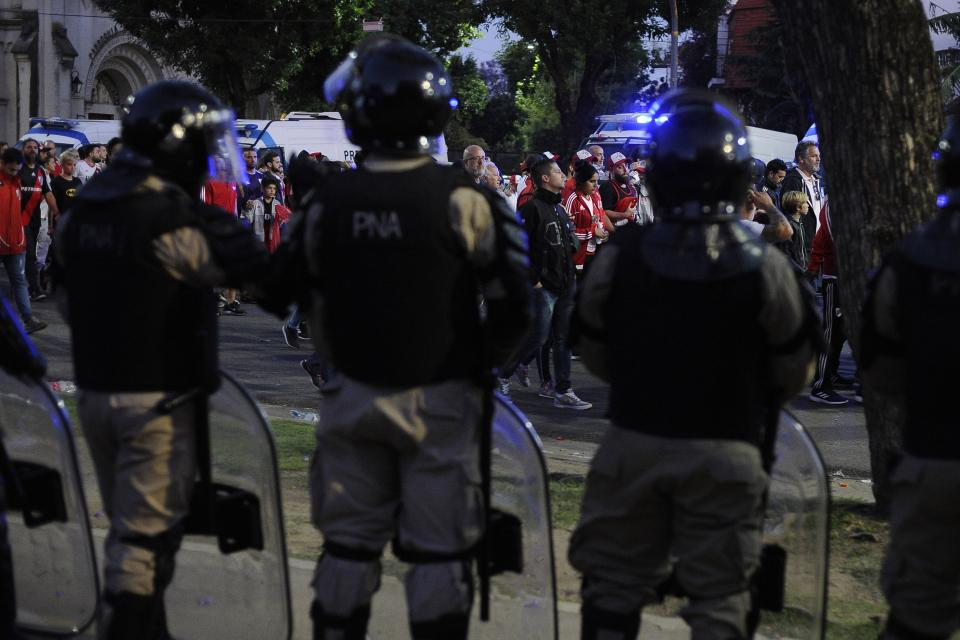

In [51]:
info_nota = scrap_nota('https://www.pagina12.com.ar/222818-river-vs-boca-obligan-a-exactas-a-suspender-las-clases-por-e')
print(info_nota['titulo'])
Image(info_nota['imagen'])

Tenemos una función que a partir de la URL de un artículo, extrae toda la información deseada. Ahora armemos una lista de urls a escrapear:

In [60]:
data = []
for i,url in enumerate(notas):
    print(f'Scraping nota {i+1}/{len(notas)}...')
    data.append(scrap_nota(url))

Scraping nota 1/1493...
Scraping nota 2/1493...
Scraping nota 3/1493...
Scraping nota 4/1493...
Scraping nota 5/1493...
Scraping nota 6/1493...
Scraping nota 7/1493...
Scraping nota 8/1493...
Scraping nota 9/1493...
Scraping nota 10/1493...
Scraping nota 11/1493...
Scraping nota 12/1493...
Scraping nota 13/1493...
Scraping nota 14/1493...
Scraping nota 15/1493...
Scraping nota 16/1493...
Scraping nota 17/1493...
Scraping nota 18/1493...
Scraping nota 19/1493...
Scraping nota 20/1493...
Scraping nota 21/1493...
Scraping nota 22/1493...
Scraping nota 23/1493...
Nota sin imagen
Scraping nota 24/1493...
Scraping nota 25/1493...
Scraping nota 26/1493...
Scraping nota 27/1493...
Scraping nota 28/1493...
Scraping nota 29/1493...
Scraping nota 30/1493...
Scraping nota 31/1493...
Scraping nota 32/1493...
Scraping nota 33/1493...
Scraping nota 34/1493...
Scraping nota 35/1493...
Scraping nota 36/1493...
Nota sin imagen
Scraping nota 37/1493...
Scraping nota 38/1493...
Scraping nota 39/1493...
Sc

Scraping nota 311/1493...
Scraping nota 312/1493...
Scraping nota 313/1493...
Scraping nota 314/1493...
Scraping nota 315/1493...
Scraping nota 316/1493...
Scraping nota 317/1493...
Scraping nota 318/1493...
Scraping nota 319/1493...
Scraping nota 320/1493...
Scraping nota 321/1493...
Scraping nota 322/1493...
Scraping nota 323/1493...
Nota sin imagen
Scraping nota 324/1493...
Nota sin imagen
Scraping nota 325/1493...
Scraping nota 326/1493...
Scraping nota 327/1493...
Scraping nota 328/1493...
Scraping nota 329/1493...
Scraping nota 330/1493...
Scraping nota 331/1493...
Scraping nota 332/1493...
Scraping nota 333/1493...
Scraping nota 334/1493...
Scraping nota 335/1493...
Scraping nota 336/1493...
Scraping nota 337/1493...
Scraping nota 338/1493...
Scraping nota 339/1493...
Scraping nota 340/1493...
Scraping nota 341/1493...
Scraping nota 342/1493...
Scraping nota 343/1493...
Scraping nota 344/1493...
Scraping nota 345/1493...
Scraping nota 346/1493...
Scraping nota 347/1493...
Scrapi

Scraping nota 618/1493...
Scraping nota 619/1493...
Scraping nota 620/1493...
Scraping nota 621/1493...
Scraping nota 622/1493...
Scraping nota 623/1493...
Scraping nota 624/1493...
Scraping nota 625/1493...
Scraping nota 626/1493...
Scraping nota 627/1493...
Scraping nota 628/1493...
Scraping nota 629/1493...
Scraping nota 630/1493...
Scraping nota 631/1493...
Scraping nota 632/1493...
Scraping nota 633/1493...
Scraping nota 634/1493...
Scraping nota 635/1493...
Scraping nota 636/1493...
Scraping nota 637/1493...
Scraping nota 638/1493...
Scraping nota 639/1493...
Scraping nota 640/1493...
Scraping nota 641/1493...
Scraping nota 642/1493...
Scraping nota 643/1493...
Scraping nota 644/1493...
Scraping nota 645/1493...
Scraping nota 646/1493...
Scraping nota 647/1493...
Scraping nota 648/1493...
Scraping nota 649/1493...
Scraping nota 650/1493...
Scraping nota 651/1493...
Scraping nota 652/1493...
Scraping nota 653/1493...
Nota sin imagen
Scraping nota 654/1493...
Scraping nota 655/1493

Scraping nota 926/1493...
Scraping nota 927/1493...
Scraping nota 928/1493...
Scraping nota 929/1493...
Scraping nota 930/1493...
Scraping nota 931/1493...
Scraping nota 932/1493...
Scraping nota 933/1493...
Scraping nota 934/1493...
Scraping nota 935/1493...
Scraping nota 936/1493...
Scraping nota 937/1493...
Scraping nota 938/1493...
Scraping nota 939/1493...
Scraping nota 940/1493...
Scraping nota 941/1493...
Scraping nota 942/1493...
Scraping nota 943/1493...
Scraping nota 944/1493...
Scraping nota 945/1493...
Scraping nota 946/1493...
Scraping nota 947/1493...
Scraping nota 948/1493...
Scraping nota 949/1493...
Scraping nota 950/1493...
Scraping nota 951/1493...
Scraping nota 952/1493...
Scraping nota 953/1493...
Scraping nota 954/1493...
Nota sin imagen
Scraping nota 955/1493...
Scraping nota 956/1493...
Scraping nota 957/1493...
Scraping nota 958/1493...
Scraping nota 959/1493...
Scraping nota 960/1493...
Scraping nota 961/1493...
Scraping nota 962/1493...
Scraping nota 963/1493

Scraping nota 1224/1493...
Scraping nota 1225/1493...
Scraping nota 1226/1493...
Scraping nota 1227/1493...
Scraping nota 1228/1493...
Scraping nota 1229/1493...
Scraping nota 1230/1493...
Nota sin imagen
Scraping nota 1231/1493...
Scraping nota 1232/1493...
Scraping nota 1233/1493...
Scraping nota 1234/1493...
Scraping nota 1235/1493...
Scraping nota 1236/1493...
Scraping nota 1237/1493...
Scraping nota 1238/1493...
Scraping nota 1239/1493...
Scraping nota 1240/1493...
Scraping nota 1241/1493...
Scraping nota 1242/1493...
Nota sin imagen
Scraping nota 1243/1493...
Scraping nota 1244/1493...
Scraping nota 1245/1493...
Scraping nota 1246/1493...
Scraping nota 1247/1493...
Scraping nota 1248/1493...
Scraping nota 1249/1493...
Scraping nota 1250/1493...
Scraping nota 1251/1493...
Scraping nota 1252/1493...
Scraping nota 1253/1493...
Scraping nota 1254/1493...
Scraping nota 1255/1493...
Nota sin imagen
Scraping nota 1256/1493...
Scraping nota 1257/1493...
Scraping nota 1258/1493...
Scrapin

In [53]:
df = pd.DataFrame(data)
df.head()

,url,fecha,titulo,volanta,copete,texto,autor,seccion,imagen
0,https://www.pagina12.com.ar/226028-banqueros-b...,2019-10-18,Banqueros buscan marcarle la cancha al próximo...,Banqueros buscan marcarle la cancha al próximo...,La Asociación de Bancos de la Argentina pidió ...,Desde Mar del PlataUn grupo de banqueros les p...,Florencia Barragan,Economía,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,https://www.pagina12.com.ar/225796-crueles-exp...,2019-10-18,Crueles experimentos de un laboratorio con mon...,Crueles experimentos de un laboratorio con mon...,Las organizaciones Soko Tierschutz y Cruelty F...,Monos viviendo en cubículos de apenas un metro...,Martín van Dam,Sociedad,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,https://www.pagina12.com.ar/226223-finalizo-la...,2019-10-19,Finalizó la ocupación de las mujeres indígenas...,Finalizó la ocupación de las mujeres indígenas...,Estuvieron diez días. Se llevan promesas y com...,"""Pasaran los años y se recordará que alguna ve...",Adriana Meyer,El país,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,https://www.pagina12.com.ar/197399-otra-manera...,2019-05-31,Otra manera de ver,Otra manera de ver,NaN,\n,Martín van Dam,Audiovisuales,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,https://www.pagina12.com.ar/226446-la-desfinan...,2019-10-21,La desfinanciación del Progresar,La desfinanciación del Progresar,En 2015 lo recibieron en promedio 724.439 jóve...,La cantidad de beneficiarios del programa de a...,Martín van Dam,Economía,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 1492
Data columns (total 9 columns):
url        2009 non-null object
fecha      2007 non-null object
titulo     2008 non-null object
volanta    2008 non-null object
copete     1112 non-null object
texto      2007 non-null object
autor      2008 non-null object
seccion    2007 non-null object
imagen     1869 non-null object
dtypes: object(9)
memory usage: 157.0+ KB


### Casos de uso
- Modelado de temáticas
- Análisis de opininón
- Análisis de sentimiento
